Kenneth Reed Pandas HW5 - Pyber

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

# File to Load
city_data_to_load = os.path.join("data","city_data.csv")
ride_data_to_load = os.path.join("data","ride_data.csv")

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load, encoding="UTF-8")
ride_data = pd.read_csv(ride_data_to_load, encoding="UTF-8")

# Combine the data into a single dataset
pyber_data_complete = pd.merge(city_data, ride_data, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Create data frame to group by type, city, driver count and sum rides and add average fare
type_group = pyber_data_complete.groupby(['type','city', 'driver_count'], as_index=False).agg({'ride_id':'count', 'fare':'mean'}).rename(columns={'ride_id':'rides', 'fare':'avg_fare'})

#type_group.head()

## Bubble Plot of Ride Sharing Data

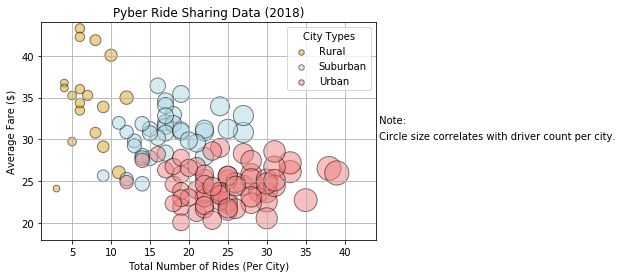

In [3]:
# Create new dataframe group just by type to plot
colors = ["goldenrod","lightblue","lightcoral"]
grouped = type_group.groupby('type')

# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
color_index = 0
for name, group in grouped:
    plt.scatter(group.rides, group.avg_fare, marker='o', c=colors[color_index], s=group.rides*15, label=name, edgecolors="black", alpha=0.5)
    color_index += 1
    
# Incorporate the other graph properties    
plt.grid(True)
plt.ylim(18,44)
plt.xlim(1,44)
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(title='City Types', scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.annotate(" Note:", xy=(44, 32))
plt.annotate(" Circle size correlates with driver count per city.", xy=(44, 30))

# Save Figure
plt.savefig("pyber_scatter.png", bbox_inches="tight")

## Total Fares by City Type

In [4]:
# Create data frame to group type
fare_group = pyber_data_complete.groupby(['type'], as_index=False).agg({'ride_id':'count', 'fare':'sum'}).rename(columns={'ride_id':'total_rides', 'fare':'total_fare'})
#fare_group.head()

In [5]:
# Calculate Type Percents for Fares and Rides
total_area_fares = fare_group['total_fare'].sum()
total_area_rides = fare_group['total_rides'].sum()

fare_group['percentageFares']= (fare_group['total_fare'] / total_area_fares) * 100
fare_group['percentageRides']= (fare_group['total_rides'] / total_area_rides) * 100

#fare_group

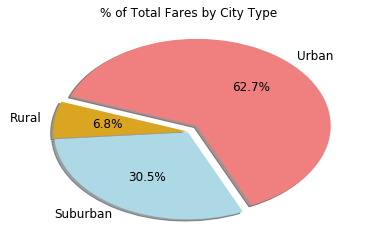

In [6]:
# Build Pie Chart
explode = (.01, .01, .09)

fare_group.plot(kind='pie', y = 'percentageFares', autopct='%1.1f%%', explode = explode, colors=colors, startangle=160, shadow=True, labels=fare_group['type'], legend = False, fontsize=12)
plt.title("% of Total Fares by City Type")
plt.axis('off')

# Save Figure
plt.savefig("pyber_percent_fares.png")

## Total Rides by City Type

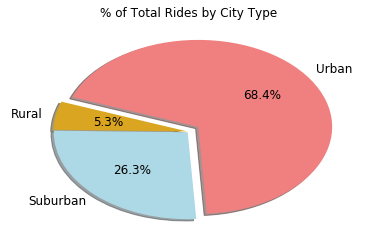

In [7]:
# Build Pie Chart
fare_group.plot(kind='pie', y = 'percentageRides', autopct='%1.1f%%', explode = explode, colors=colors, startangle=160, shadow=True, labels=fare_group['type'], legend = False, fontsize=12)
plt.title("% of Total Rides by City Type")
plt.axis('off')

# Save Figure
plt.savefig("pyber_percent_rides.png")

## Total Drivers by City Type

In [8]:
# Create data frame to group by type for drivers
driver_group = type_group.groupby(['type'], as_index=False).agg({'driver_count':'sum'}).rename(columns={'driver_count':'total_drivers'})

#driver_group

In [9]:
# Calculate Type Percents for Drivers
total_area_drivers = driver_group['total_drivers'].sum()

driver_group['percentageDrivers'] = (driver_group['total_drivers'] / total_area_drivers) * 100
#driver_group

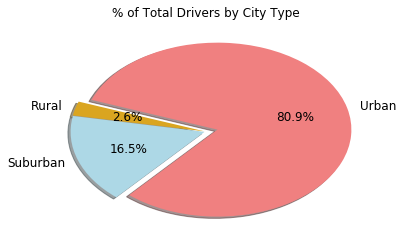

In [10]:
# Build Pie Chart
driver_group.plot(kind='pie', y = 'percentageDrivers', autopct='%1.1f%%', explode = explode, colors=colors, startangle=160, shadow=True, labels=driver_group['type'], legend = False, fontsize=12)
plt.title("% of Total Drivers by City Type")
plt.axis('off')

# Save Figure
plt.savefig("pyber_percent_drivers.png")